<a href="https://colab.research.google.com/github/OmprakashDebata/Netflix_Content_Clustering/blob/main/Project_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Exploring Netflix Content Clusters



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** OMPRAKASH DEBATA

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Netflix, the leading global streaming service with over 220 million subscribers, aims to enhance user experience and prevent subscriber churn by effectively clustering the diverse array of TV shows and movies available on its platform. The dataset, collected from Flixable, provides valuable insights into the content landscape, and integration with external datasets like IMDB ratings and Rotten Tomatoes can further enrich the analysis. The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [93]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [94]:
# Load Dataset
netflix = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [95]:
# Dataset First Look
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [96]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [97]:
netflix.shape

(7787, 12)

### Dataset Rows & Columns count

In [98]:
# Dataset Rows & Columns count
print(f'Total number of rows =',netflix.shape[0])
print(f'Total number of Columns =',netflix.shape[1])

Total number of rows = 7787
Total number of Columns = 12


### Dataset Information

In [99]:
# Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [100]:
# Dataset Duplicate Value Count
netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [101]:
# Missing Values/Null Values Count
print (f"Missing Values in each column :"+"\n" + "--"*15)
netflix.isnull().sum().sort_values(ascending=False)

Missing Values in each column :
------------------------------


director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

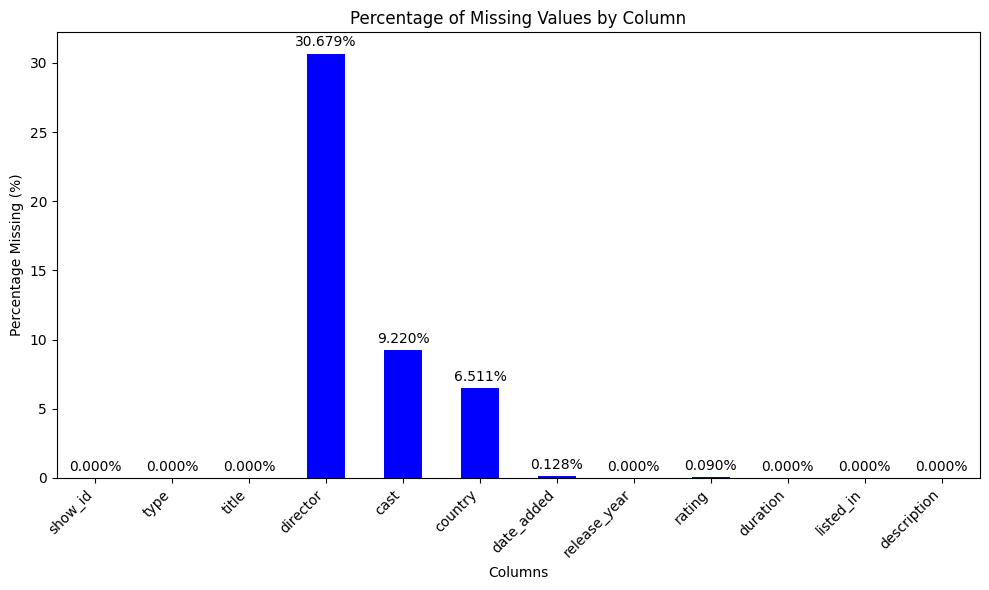

In [102]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent = round((netflix.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='blue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

### What did you know about your dataset?

- The dataset comprises 7,787 records with 12 features.
- Notably, five features contain missing values. The "director" field has the highest proportion of null values, constituting around 30% of its data. In contrast, the remaining four features exhibit less than 10% missing data.
- Among the 12 features, 11 are categorical, while "release_year" stands out as the sole numerical feature.
- The "date_added" column values are presented in a time/date format, and the "duration" column values are in a numeric format. As a result, both columns require conversion from the object type to their respective data types.

## ***2. Understanding Your Variables***

In [103]:
# Dataset Columns
print(f"Columns name:\n{netflix.columns}")

Columns name:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [104]:
# Dataset Describe
netflix.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

- show_id: Unique identifier assigned to each movie or TV show entry.

- type: Indicates whether the entry represents a movie or a TV show.

- title: Name of the movie or TV show.

- director: Director(s) responsible for the movie or TV show.

- cast: Ensemble of actors and actresses featured in the movie or TV show.

- country: Country or countries where the movie or TV show was produced.

- date_added: Date when the movie or TV show became available on Netflix.

- release_year: Year of initial release for the movie or TV show.

- rating: Assigned TV or movie rating for the content.

- duration: Length of the movie in minutes or the number of seasons for TV shows.

- listed_in: Categories or genres to which the movie or TV show belongs.

- description: Brief synopsis or summary providing an overview of the movie or TV

### Check Unique Values for each variable.

In [105]:
# Check Unique Values for each variable.

print("The number of unique values in: ")
print("--"*16)
for i in netflix.columns:
  print(f"'{i}' : {netflix[i].nunique()}")

The number of unique values in: 
--------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

#### 1. Handling Null values from each feature

In [106]:
## Calculate missing persentage for each column
missing_percent = round(netflix.isnull().mean()*100,2)
print(missing_percent)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


In [107]:
# Drop records of those columns whose missing values less than 5%.
netflix.dropna(subset=['date_added', 'rating'], inplace=True)

In [108]:
# calculate mode & fill missing of country column

# Create a SimpleImputer with the "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Transform and fill the missing values in the "country" column
netflix['country'] = imputer.fit_transform(netflix[['country']])

In [109]:
# Replace missing values in the "cast" column with "unknown"
netflix['cast'].fillna('unknown', inplace=True)

# Replace missing values in the "director" column with "unknown"
netflix['director'].fillna('unknown', inplace=True)

In [110]:
# Calculate missing persentage for each column

missing_percent = round(netflix.isnull().mean()*100,2)
print(missing_percent)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


#### date_added to date type

In [111]:
# Convert the "date_added" column to datetime type
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [112]:
# Extract date, month and year

netflix['added_day'] = netflix['date_added'].dt.day
netflix['added_month'] = netflix['date_added'].dt.month
netflix['added_year'] = netflix['date_added'].dt.year

netflix[['date_added','added_day','added_month','added_year']].head()

,date_added,added_day,added_month,added_year
0,2020-08-14,14,8,2020
1,2016-12-23,23,12,2016
2,2018-12-20,20,12,2018
3,2017-11-16,16,11,2017
4,2020-01-01,1,1,2020


In [113]:
# Dropping date_added
netflix.drop('date_added', axis=1, inplace=True)

In [114]:
netflix.shape

(7770, 14)

#### Convert Duration column data into numeric data

In [115]:
# Extract the numeric part of the "duration" column and convert it to integer
netflix['duration'] = netflix['duration'].str.extract('(\d+)').astype(int)

In [116]:
netflix["duration"].sample(5)

6951     99
4420    114
2608     78
875     107
3893      4
Name: duration, dtype: int64

#### Handling rating column

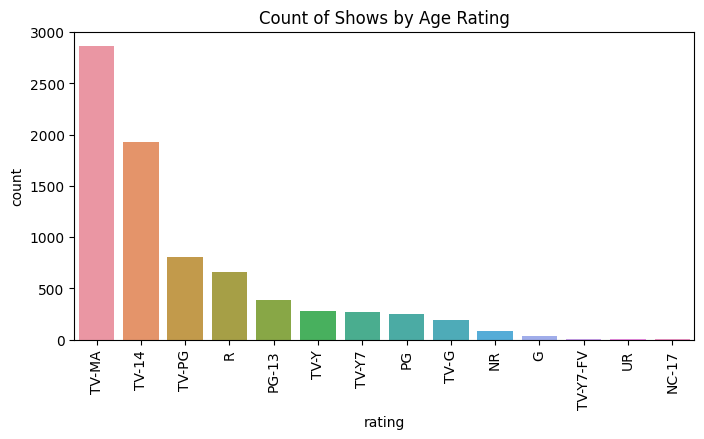

In [117]:
# Create a countplot to visualize the ratings column

plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=netflix, order=netflix['rating'].value_counts().index)
plt.title('Count of Shows by Age Rating')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [118]:
# Unique values of rating

print(netflix["rating"].unique())
netflix["rating"].nunique()

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


14

In [119]:
# Create corresponding alternate map for all categories

rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'NR':'Adults',
              'NC-17':'Adults',
              'UR':'Adults',
              'TV-14':'Young Adults',
              'PG-13':'Teens',
              'TV-PG':'Older Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'TV-Y7-FV':'Older Kids',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'G':'Kids',
            }

In [120]:
# Replace by map values
netflix['rating'].replace(rating_map, inplace=True)

In [121]:
print(netflix['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


#### Extract the main value for country and listed_in

In [122]:
# check values of coutry column
netflix["country"].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [123]:
# check values of listed_in column
netflix["listed_in"].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [174]:
# Function to extract the primary value
def extract_primary(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value

# Apply the function to 'country' and 'listed_in' columns
netflix['country'] = netflix['country'].apply(extract_primary)
netflix['listed_in'] = netflix['listed_in'].apply(extract_primary)

#keep oroginal copy safe
netflix_data=netflix.copy()

netflix_data.head().T

,0,1,2,3,4
show_id,s1,s2,s3,s4,s5
type,TV Show,Movie,Movie,Movie,Movie
title,3%,7:19,23:59,9,21
director,unknown,Jorge Michel Grau,Gilbert Chan,Shane Acker,Robert Luketic
cast,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Elijah Wood, John C. Reilly, Jennifer Connelly...","Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
country,Brazil,Mexico,Singapore,United States,United States
release_year,2020,2016,2011,2009,2008
rating,Adults,Adults,Adults,Teens,Teens
duration,4,93,78,80,123
listed_in,International TV Shows,Dramas,Horror Movies,Action & Adventure,Dramas


### What all manipulations have you done and insights you found?

**Handling Missing Values:**

- In the Netflix dataset, I dropped null values in 5 columns; ratings and date_added had less than 5% missing values, so I used dropna().
- For country, cast, and director with 6%, 9%, and 30% missing values, I replaced country's missing values with the most frequent values using SimpleImputer(), and set unknown values for cast and director.

**Handling Duration, Date_added, and Ratings:**
- Duration, initially in object form, was converted to integer form by removing words like min/season.
- Date_added, containing dates, was converted to date form, and day, month, and year were extracted.
- Ratings, with various user ratings, were transformed into categories such as adult, kids, teens, etc.

**Extracting Primary Values for Country & Listed_in:**
- Extracted primary values from the country and listed_in columns, considering the multiple values they contained.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [125]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [126]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [127]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [128]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [129]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [130]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [131]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [132]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [133]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [134]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [135]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [136]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [137]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [138]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [139]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [140]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [141]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [142]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [143]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [144]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [145]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [146]:
# Expand Contraction

#### 2. Lower Casing

In [147]:
# Lower Casing

#### 3. Removing Punctuations

In [148]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [149]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [150]:
# Remove Stopwords

In [151]:
# Remove White spaces

#### 6. Rephrase Text

In [152]:
# Rephrase Text

#### 7. Tokenization

In [153]:
# Tokenization

#### 8. Text Normalization

In [154]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [155]:
# POS Taging

#### 10. Text Vectorization

In [156]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [157]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [158]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [159]:
# Transform Your data

### 6. Data Scaling

In [160]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [161]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [162]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [163]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [164]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [165]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [166]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [167]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [168]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [169]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [170]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [171]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [172]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [173]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***